<img src="https://raw.githubusercontent.com/cgiohidalgo/JupyterHub-nbgrader/main/70_Rojo.jpg" alt="udenar" width="140"/>
<div style="text-align: center"> DIPLOMADO EN INTELIGENCIA DE NEGOCIOS</div>

</div>


In [8]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np
import math

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
import scipy.stats 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error



In [9]:
datos = pd.read_csv("familycar.csv")

In [10]:
datos

,Nombre,CaballosFuerza,Precio,Familiar
0,Honda Civic,52,11500,1
1,Merc 240D,62,11900,1
2,Ford Festiva 4,63,6319,1
3,Toyota Corolla,65,17872,1
4,Fiat 128,66,3470,1
...,...,...,...,...
84,Lincoln Continental,215,58900,0
85,Ford Mustang V8,225,12164,0
86,Chrysler Imperial,230,9750,0
87,Duster 360,245,34500,0


In [11]:
print(datos.groupby('Precio').size())



Precio
2500     1
3470     3
4059     1
4697     1
5866     1
        ..
34500    1
49000    1
54900    1
58900    1
96500    1
Length: 84, dtype: int64


/tmp/ipykernel_303/501791091.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  datos.drop(['Precio'],1).hist(facecolor='blue', alpha=0.9, bins=10)


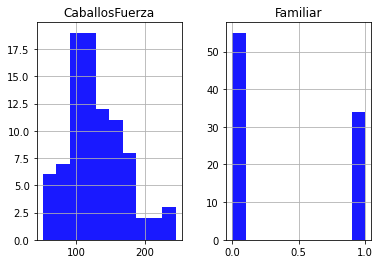

In [12]:
datos.drop(['Precio'],1).hist(facecolor='blue', alpha=0.9, bins=10)
plt.show()

In [13]:
datos1.plot.scatter(x='CaballosFuerza', y='Precio');

NameError: name 'datos1' is not defined

# features and class

In [15]:
#X = np.array(datos1.drop(['Precio'],1)) #Quita etiqueta Fare al nuevo dataset X
#Y = np.array(datos1['Precio']) #pone la etiqueta Fare al nuevo dataset Y

features = ['CaballosFuerza']
X = datos[features].to_numpy() # Features
y = datos['Precio'].to_numpy()

# Dataset de entrenamiento y testeo

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, train_size=0.5)

# Selección de modelo


In [17]:
modelo = linear_model.LinearRegression()

# Entretar el modelo

In [18]:
modelo.fit(X_train, Y_train)

LinearRegression()

# Predecir con el modelo 

In [19]:
Y_pred = modelo.predict(X_test)

# Score

In [21]:
modelo.score(X,y)

0.0964951585145678

In [ ]:
from sklearn import metrics
# The coefficients: 1 is perfect prediction
print('Coefficients: %.2f' % modelo.coef_)
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(Y_test, Y_pred))
print('Mean Absolute Error: %.2f' % metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error: %.2f' % metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error: %.2f'% np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

# Resultados

In [ ]:
plt.scatter(X_train, Y_train,  color='blue')
plt.plot(X_test, Y_pred, color='orange', linewidth=3)
plt.title('Precio vs Fuerza')
plt.xlabel('Precio')
plt.ylabel('Caballos de Fuerza')
#plt.xticks(())
#plt.yticks(())
plt.show()

In [ ]:
plt.scatter(X_test, Y_test,  color='black')
plt.plot(X_test, Y_pred, color='orange', linewidth=3)
plt.title('Precio vs Fuerza')
plt.xlabel('Precio')
plt.ylabel('Caballos de Fuerza')
#plt.xticks(())
#plt.yticks(())
plt.show()

# Predicción de nuevos registros

In [ ]:
X_new = pd.DataFrame({'Caballos de fuerza': [173]})
modelo.predict(X_new).astype(float)
print('La personas paga %.0f USD' % modelo.predict(X_new).astype(int))